# Particle Swarm Optimization (PSO)
<a href="https://colab.research.google.com/github/milocortes/mod_04_concentracion/blob/main/src/talleres_clase/pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
# Función Himmelblau 
def himmelblau(X):
    x,y = X
    return (x**2 + y -11)**2 + (x + y**2 -7)**2

/home/milo/anaconda3/envs/lac_decarbonization/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  


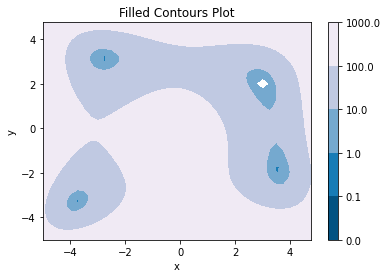

In [2]:
# Grafica de contorno
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm


# Generamos valores para Y y X.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X**2 + Y -11)**2 + (X + Y**2 -7)**2

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
fig.colorbar(cp)
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [3]:
# Para hacer el muestreo por Latin Hypecube
from scipy.stats.qmc import LatinHypercube,scale

# Tamaño de la población
n = 400

# Número de variables
n_var = 2

engine = LatinHypercube(d=2)
sample = engine.random(n=n)

l_bounds = np.array([-5,-5])
u_bounds = np.array([5,5])

sample_scaled = scale(sample,l_bounds, u_bounds)

/home/milo/anaconda3/envs/lac_decarbonization/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Log scale: values of z <= 0 have been masked
  


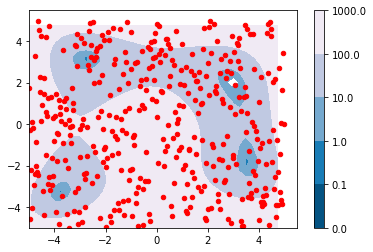

In [4]:
# Visualizamos el muestreo
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
ax.scatter(sample_scaled.T[0], sample_scaled.T[1],color='red',s = 20)
fig.colorbar(cp) # Add a colorbar to a plot
plt.show()

In [5]:
# Definimos la clase Particle
class Particle:
    def __init__(self,x,v):
        self.x = x
        self.v = v
        self.x_best = x

/home/milo/anaconda3/envs/lac_decarbonization/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Log scale: values of z <= 0 have been masked


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
0.8230788707733154 segundos


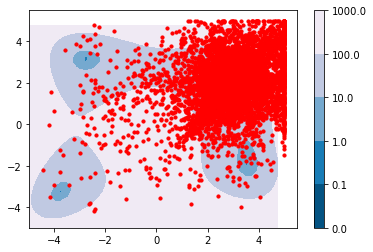

In [6]:
# Generamos la población de n partículas
maxiter = 60
sample_scaled = scale(sample,l_bounds, u_bounds)
pob = [Particle(x,np.array([0]*n_var)) for x in sample_scaled]


x_best = pob[0].x_best
y_best = 100000000000

# Cognitive scaling parameter
α = 0.8
# Social scaling parameter
β = 0.8

# velocity inertia
w = 0.5
# minimum value for the velocity inertia
w_min = 0.4
# maximum value for the velocity inertia
w_max = 0.9

# Velocidad máxima
vMax = np.multiply(u_bounds-l_bounds,0.2)
# Velocidad mínima
vMin = -vMax


### Generamos un giff de las figuras de la matriz en las distintas iteraciones
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
fig.colorbar(cp) 

ims = []

for P in pob:
    y = himmelblau(P.x)
    if y < y_best:
        x_best = P.x_best
        y_best = y

import time

start_time = time.time()

for k in range(maxiter):
    print(k)
    x_arr = []
    y_arr = []
    for P in pob:
        # Actualiza velocidad de la partícula
        ϵ1,ϵ2 = np.random.uniform(), np.random.uniform()
        P.v = w*P.v + α*ϵ1*(P.x_best - P.x) + β*ϵ2*(x_best - P.x)
        
        # Ajusta velocidad de la partícula
        index_vMax = np.where(P.v > vMax)
        index_vMin = np.where(P.v < vMin)
        
        if np.array(index_vMax).size > 0:
            P.v[index_vMax] = vMax[index_vMax]
        if np.array(index_vMin).size > 0:
            P.v[index_vMin] = vMin[index_vMin]
        
        # Actualiza posición de la partícula
        P.x += P.v
        
        # Ajusta posición de la particula
        index_pMax = np.where(P.x > u_bounds)
        index_pMin = np.where(P.x < l_bounds)
        
        if np.array(index_pMax).size > 0:
            P.x[index_pMax] = u_bounds[index_pMax]
        if np.array(index_pMin).size > 0:
            P.x[index_pMin] = l_bounds[index_pMin]
                
        # Evaluamos la función
        y = himmelblau(P.x)
        
        if y < y_best:
            x_best = np.copy(P.x_best)
            y_best = y
        if y < himmelblau(P.x_best):
            P.x_best = np.copy(P.x)

        # Actualizamos w
        
        w = w_max - k * ((w_max-w_min)/maxiter)
        
        x_arr.append(P.x_best[0])
        y_arr.append(P.x_best[1])

    #print(x_best)
    #print(y_best)
    im = ax.scatter(x_arr, y_arr,color='red',s = 10)
    ims.append([im])

print("{} segundos".format(time.time() - start_time))

In [7]:
import matplotlib.animation as animation

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
writer = animation.PillowWriter(fps=2)

ani.save("demo_himmelblau.gif", writer=writer)

## Eggholder

In [8]:
def eggholder(X):
    x,y = X
    return -(y+47) * np.sin(np.sqrt(abs( (x/2) + (y+47) ))) - x*np.sin( np.sqrt( abs(x - (y+47))))

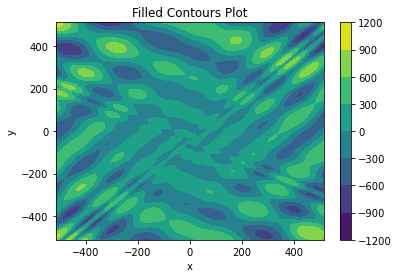

In [9]:

# Generamos valores para Y y X.
X = np.arange(-515, 512, 0.25)
Y = np.arange(-512, 512, 0.25)
X, Y = np.meshgrid(X, Y)
Z =  -(Y+47) * np.sin(np.sqrt(abs( (X/2) + (Y+47) ))) - X*np.sin( np.sqrt( abs(X - (Y+47))))

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
9.663851976394653 segundos


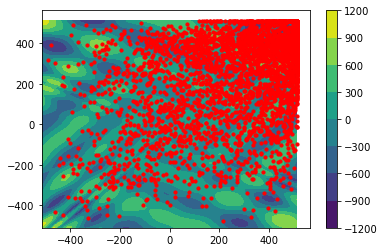

In [10]:
# Para hacer el muestreo por Latin Hypecube
from scipy.stats.qmc import LatinHypercube,scale

# Tamaño de la población
n = 1000

# Número de variables
n_var = 2

engine = LatinHypercube(d=2)
sample = engine.random(n=n)

l_bounds = np.array([-512,-512])
u_bounds = np.array([512,512])

sample_scaled = scale(sample,l_bounds, u_bounds)


# Generamos la población de n partículas
maxiter = 200
sample_scaled = scale(sample,l_bounds, u_bounds)
pob = [Particle(x,np.array([0]*n_var)) for x in sample_scaled]


x_best = pob[0].x_best
y_best = 100000000000

# Cognitive scaling parameter
α = 0.5
# Social scaling parameter
β = 0.5

# velocity inertia
w = 0.5
# minimum value for the velocity inertia
w_min = 0.4
# maximum value for the velocity inertia
w_max = 0.9

# Velocidad máxima
vMax = np.multiply(u_bounds-l_bounds,0.2)
# Velocidad mínima
vMin = -vMax


### Generamos un giff de las figuras de la matriz en las distintas iteraciones
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 

ims = []

for P in pob:
    y = eggholder(P.x)
    if y < y_best:
        x_best = P.x_best
        y_best = y

import time

start_time = time.time()

for k in range(maxiter):
    print(k)
    x_arr = []
    y_arr = []
    for P in pob:
        # Actualiza velocidad de la partícula
        ϵ1,ϵ2 = np.random.uniform(), np.random.uniform()
        P.v = w*P.v + α*ϵ1*(P.x_best - P.x) + β*ϵ2*(x_best - P.x)
        
        # Ajusta velocidad de la partícula
        index_vMax = np.where(P.v > vMax)
        index_vMin = np.where(P.v < vMin)
        
        if np.array(index_vMax).size > 0:
            P.v[index_vMax] = vMax[index_vMax]
        if np.array(index_vMin).size > 0:
            P.v[index_vMin] = vMin[index_vMin]
        
        # Actualiza posición de la partícula
        P.x += P.v
        
        # Ajusta posición de la particula
        index_pMax = np.where(P.x > u_bounds)
        index_pMin = np.where(P.x < l_bounds)
        
        if np.array(index_pMax).size > 0:
            P.x[index_pMax] = u_bounds[index_pMax]
        if np.array(index_pMin).size > 0:
            P.x[index_pMin] = l_bounds[index_pMin]
                
        # Evaluamos la función
        y = eggholder(P.x)
        
        if y < y_best:
            x_best = np.copy(P.x_best)
            y_best = y
        if y < eggholder(P.x_best):
            P.x_best = np.copy(P.x)

        # Actualizamos w
        
        w = w_max - k * ((w_max-w_min)/maxiter)
        
        x_arr.append(P.x_best[0])
        y_arr.append(P.x_best[1])

    #print(x_best)
    #print(y_best)
    im = ax.scatter(x_arr, y_arr,color='red',s = 10)
    ims.append([im])

print("{} segundos".format(time.time() - start_time))

In [11]:
import matplotlib.animation as animation

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
writer = animation.PillowWriter(fps=2)

ani.save("demo_eggholder.gif", writer=writer)

In [12]:
x_best

array([512.        , 404.23180499])

## Easom function

In [13]:
def easom(X):
    x,y = X
    return -np.cos(x)*np.cos(y)*np.exp( -( (x-np.pi)**2 + (y-np.pi)**2 ) )

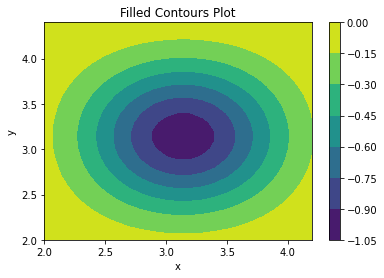

In [14]:
# Generamos valores para Y y X.
X = np.arange(2, 4.3, 0.1)
Y = np.arange(2, 4.5, 0.1)
X, Y = np.meshgrid(X, Y)
Z =   -np.cos(X)*np.cos(Y)*np.exp( -( (X-np.pi)**2 + (Y-np.pi)**2 ) )

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

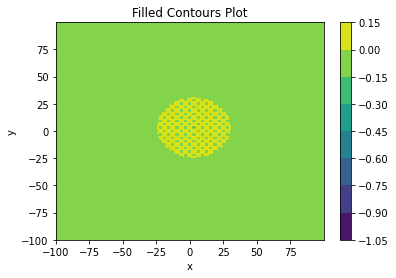

In [15]:
# Generamos valores para Y y X.
X = np.arange(-100, 100, 0.1)
Y = np.arange(-100, 100, 0.1)
X, Y = np.meshgrid(X, Y)
Z =   -np.cos(X)*np.cos(Y)*np.exp( -( (X-np.pi)**2 + (Y-np.pi)**2 ) )

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
7.419419288635254 segundos


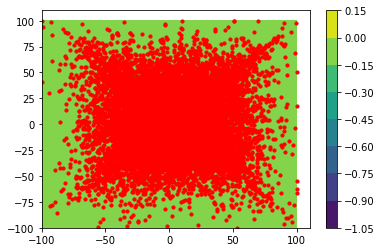

In [16]:
# Para hacer el muestreo por Latin Hypecube
from scipy.stats.qmc import LatinHypercube,scale

# Tamaño de la población
n = 1000

# Número de variables
n_var = 2

engine = LatinHypercube(d=2)
sample = engine.random(n=n)

l_bounds = np.array([-100,-100])
u_bounds = np.array([100,100])

sample_scaled = scale(sample,l_bounds, u_bounds)


# Generamos la población de n partículas
maxiter = 200
sample_scaled = scale(sample,l_bounds, u_bounds)
pob = [Particle(x,np.array([0]*n_var)) for x in sample_scaled]


x_best = pob[0].x_best
y_best = 100000000000

# Cognitive scaling parameter
α = 0.5
# Social scaling parameter
β = 0.5

# velocity inertia
w = 0.5
# minimum value for the velocity inertia
w_min = 0.4
# maximum value for the velocity inertia
w_max = 0.9

# Velocidad máxima
vMax = np.multiply(u_bounds-l_bounds,0.2)
# Velocidad mínima
vMin = -vMax


### Generamos un giff de las figuras de la matriz en las distintas iteraciones
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 

ims = []

for P in pob:
    y = easom(P.x)
    if y < y_best:
        x_best = P.x_best
        y_best = y

import time

start_time = time.time()

for k in range(maxiter):
    print(k)
    x_arr = []
    y_arr = []
    for P in pob:
        # Actualiza velocidad de la partícula
        ϵ1,ϵ2 = np.random.uniform(), np.random.uniform()
        P.v = w*P.v + α*ϵ1*(P.x_best - P.x) + β*ϵ2*(x_best - P.x)
        
        # Ajusta velocidad de la partícula
        index_vMax = np.where(P.v > vMax)
        index_vMin = np.where(P.v < vMin)
        
        if np.array(index_vMax).size > 0:
            P.v[index_vMax] = vMax[index_vMax]
        if np.array(index_vMin).size > 0:
            P.v[index_vMin] = vMin[index_vMin]
        
        # Actualiza posición de la partícula
        P.x += P.v
        
        # Ajusta posición de la particula
        index_pMax = np.where(P.x > u_bounds)
        index_pMin = np.where(P.x < l_bounds)
        
        if np.array(index_pMax).size > 0:
            P.x[index_pMax] = u_bounds[index_pMax]
        if np.array(index_pMin).size > 0:
            P.x[index_pMin] = l_bounds[index_pMin]
                
        # Evaluamos la función
        y = easom(P.x)
        
        if y < y_best:
            x_best = np.copy(P.x_best)
            y_best = y
        if y < easom(P.x_best):
            P.x_best = np.copy(P.x)

        # Actualizamos w
        
        w = w_max - k * ((w_max-w_min)/maxiter)
        
        x_arr.append(P.x_best[0])
        y_arr.append(P.x_best[1])

    #print(x_best)
    #print(y_best)
    im = ax.scatter(x_arr, y_arr,color='red',s = 10)
    ims.append([im])

print("{} segundos".format(time.time() - start_time))

In [17]:
import matplotlib.animation as animation

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
writer = animation.PillowWriter(fps=2)

ani.save("demo_easom.gif", writer=writer)

In [18]:
x_best

array([3.14159266, 3.14159265])

## Cross-in-tray function	

In [19]:
def crossintray(X):
    x,y = X
    return -0.0001*(  abs(np.sin(x)*np.sin(y)*np.exp( abs( 100 - ( (np.sqrt( x**2 +y**2 ))/np.pi )  ) )) )**0.1

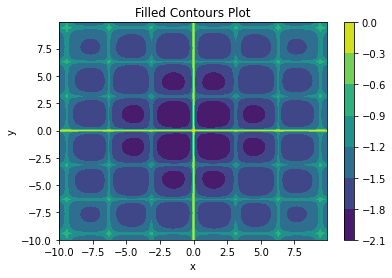

In [20]:
# Generamos valores para Y y X.
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)
Z =   -0.0001*(  abs(np.sin(X)*np.sin(Y)*np.exp( abs( 100 - ( (np.sqrt( X**2 +Y**2 ))/np.pi )  ) )) )**0.1

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
8.010602712631226 segundos


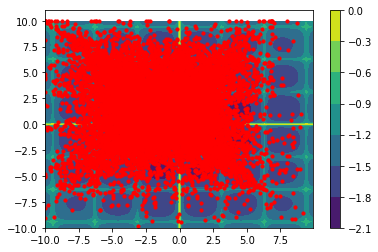

In [21]:
# Para hacer el muestreo por Latin Hypecube
from scipy.stats.qmc import LatinHypercube,scale

# Tamaño de la población
n = 1000

# Número de variables
n_var = 2

engine = LatinHypercube(d=2)
sample = engine.random(n=n)

l_bounds = np.array([-10,-10])
u_bounds = np.array([10,10])

sample_scaled = scale(sample,l_bounds, u_bounds)


# Generamos la población de n partículas
maxiter = 200
sample_scaled = scale(sample,l_bounds, u_bounds)
pob = [Particle(x,np.array([0]*n_var)) for x in sample_scaled]


x_best = pob[0].x_best
y_best = 100000000000

# Cognitive scaling parameter
α = 0.5
# Social scaling parameter
β = 0.5

# velocity inertia
w = 0.5
# minimum value for the velocity inertia
w_min = 0.4
# maximum value for the velocity inertia
w_max = 0.9

# Velocidad máxima
vMax = np.multiply(u_bounds-l_bounds,0.2)
# Velocidad mínima
vMin = -vMax


### Generamos un giff de las figuras de la matriz en las distintas iteraciones
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 

ims = []

for P in pob:
    y = crossintray(P.x)
    if y < y_best:
        x_best = P.x_best
        y_best = y

import time

start_time = time.time()

for k in range(maxiter):
    print(k)
    x_arr = []
    y_arr = []
    for P in pob:
        # Actualiza velocidad de la partícula
        ϵ1,ϵ2 = np.random.uniform(), np.random.uniform()
        P.v = w*P.v + α*ϵ1*(P.x_best - P.x) + β*ϵ2*(x_best - P.x)
        
        # Ajusta velocidad de la partícula
        index_vMax = np.where(P.v > vMax)
        index_vMin = np.where(P.v < vMin)
        
        if np.array(index_vMax).size > 0:
            P.v[index_vMax] = vMax[index_vMax]
        if np.array(index_vMin).size > 0:
            P.v[index_vMin] = vMin[index_vMin]
        
        # Actualiza posición de la partícula
        P.x += P.v
        
        # Ajusta posición de la particula
        index_pMax = np.where(P.x > u_bounds)
        index_pMin = np.where(P.x < l_bounds)
        
        if np.array(index_pMax).size > 0:
            P.x[index_pMax] = u_bounds[index_pMax]
        if np.array(index_pMin).size > 0:
            P.x[index_pMin] = l_bounds[index_pMin]
                
        # Evaluamos la función
        y = crossintray(P.x)
        
        if y < y_best:
            x_best = np.copy(P.x_best)
            y_best = y
        if y < crossintray(P.x_best):
            P.x_best = np.copy(P.x)

        # Actualizamos w
        
        w = w_max - k * ((w_max-w_min)/maxiter)
        
        x_arr.append(P.x_best[0])
        y_arr.append(P.x_best[1])

    #print(x_best)
    #print(y_best)
    im = ax.scatter(x_arr, y_arr,color='red',s = 10)
    ims.append([im])

print("{} segundos".format(time.time() - start_time))

In [22]:
import matplotlib.animation as animation

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
writer = animation.PillowWriter(fps=2)

ani.save("demo_crossintray.gif", writer=writer)

In [23]:
x_best

array([-1.34940663,  1.34940663])